# Accessing and visualizing feature data

 - from feature service with multiple layers
 - from feature collection items
 - from a map service with feature access enabled

In [1]:
from arcgis.gis import *
from getpass import getpass

In [2]:
password=getpass()
gis = GIS("https://pycontraptions.maps.arcgis.com", "atma_mani", password)

········


Search for a feature service titled 'fortune_500_styled_wfl'

In [3]:
search_result = gis.content.search('title:fortune_500_styled_wfl', item_type = 'Feature Layer')
search_result

[<Item title:"fortune_500_styled_wfl" type:Feature Service owner:atma_mani>]

In [5]:
fortune_fl_item = search_result[0]
fortune_fl_item

<Item title:"fortune_500_styled_wfl" type:Feature Service owner:atma_mani>

Notice that this is a **Feature Layer Collection**

### Accessing a Feature Layer Collection
A Feature Layer Collection is simply a collection of Feature Layer objects

In [6]:
from arcgis.features import FeatureLayerCollection

In [7]:
fortune_fl_item.url

'https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer'

Notice the url ends with a `FeatureServer`. We can use this URL to instantiate a `FeatureLayerCollection` object.

In [8]:
flc = FeatureLayerCollection(fortune_fl_item.url, gis)
type(flc)

arcgis.features.layer.FeatureLayerCollection

In [9]:
flc.layers

[<FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/3">]

In [10]:
flc_ly1 = flc.layers[0]
type(flc_ly1)

arcgis.features.layer.FeatureLayer

Thus `FeatureLayerCollection.layers` = `[FeatureLayer]` objects

## Accessing a Feature Layer

In [11]:
fl_list = fortune_fl_item.layers
type(fl_list[0])

arcgis.features.layer.FeatureLayer

Thus FeatureLayer objects can be directly obtained from Item objects as well

In [12]:
fl_list

[<FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/3">]

In [13]:
for layer in fl_list:
    print(layer.properties.name)

cities_over1mil
Fortune_500_Corporate_HQ
cities_over100k
Counties


In [14]:
cities_million_pop = fl_list[0]

In [15]:
cities_million_pop.properties.extent

{
  "xmin": -13627667.422245564,
  "ymin": 3473190.4835932995,
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "ymax": 5210794.33529687,
  "xmax": -8238277.595337318
}

In [16]:
map1 = gis.map('USA')
map1

In [17]:
map1.add_layer(cities_million_pop)

You can visualize `FeatureLayer` objects on the map widget

## Accessing FeatureSet objects
Let us query the FeatureLayer objected created above to get a `FeatureSet` in return

In [18]:
cities_million_pop.properties.fields

[{
   "alias": "OBJECTID",
   "nullable": false,
   "type": "esriFieldTypeOID",
   "editable": false,
   "defaultValue": null,
   "domain": null,
   "name": "OBJECTID",
   "sqlType": "sqlTypeOther"
 }, {
   "alias": "FEATURE",
   "nullable": true,
   "length": 60,
   "editable": true,
   "defaultValue": null,
   "domain": null,
   "type": "esriFieldTypeString",
   "name": "FEATURE",
   "sqlType": "sqlTypeOther"
 }, {
   "alias": "NAME",
   "nullable": true,
   "length": 48,
   "editable": true,
   "defaultValue": null,
   "domain": null,
   "type": "esriFieldTypeString",
   "name": "NAME",
   "sqlType": "sqlTypeOther"
 }, {
   "alias": "POP",
   "nullable": true,
   "type": "esriFieldTypeDouble",
   "editable": true,
   "defaultValue": null,
   "domain": null,
   "name": "POP",
   "sqlType": "sqlTypeOther"
 }]

Let us write an empty query so we can get all the features

In [19]:
cities_mil_fset = cities_million_pop.query()
type(cities_mil_fset)

arcgis.features.feature.FeatureSet

In [20]:
cities_mil_fset.geometry_type

'esriGeometryPoint'

In [21]:
cities_mil_fset.spatial_reference

{'latestWkid': 3857, 'wkid': 102100}

In [22]:
cities_mil_fset.df

FEATURE          NAME  \
OBJECTID                                                                
1         Population greater than 999,999   County Seat   Los Angeles   
2         Population greater than 999,999   County Seat     San Diego   
3         Population greater than 999,999   County Seat      New York   
4         Population greater than 999,999   County Seat  Philadelphia   
5         Population greater than 999,999   County Seat        Dallas   
6         Population greater than 999,999   County Seat       Houston   
7         Population greater than 999,999   County Seat       Chicago   
8         Population greater than 999,999   County Seat       Detroit   

              POP    geometry.x    geometry.y  
OBJECTID                                       
1         3485398 -1.316297e+07  4.035820e+06  
2         1110549 -1.304195e+07  3.857562e+06  
3         7322564 -8.238278e+06  4.970310e+06  
4         1585577 -8.367174e+06  4.859018e+06  
5         1006877 -1.077579e+07  3.866612e+06  
6         1630553 -1.061585e+07  3.473191e+06  
7         2783726 -9.757182e+06  5.138534e+06  
8         1027974 -9.244611e+06  5.210796e+06

## Accessing Feature objects
Now get the `Features` from cities over 1 million population `FeatureSet`

In [23]:
cities_mil_features = cities_mil_fset.features
type(cities_mil_features)

list

In [24]:
len(cities_mil_features)

8

In [25]:
type(cities_mil_features[0])

arcgis.features.feature.Feature

In [27]:
f1= cities_mil_features[0]

In [28]:
f1.geometry

{'x': -13162974.851296365, 'y': 4035820.2117743446}

## Accessing a FeatureCollection object

In [31]:
fc_search = gis.content.search('*_fc', item_type='Feature Collection')
fc_search

[<Item title:"cities_over1mil_fc" type:Feature Collection owner:atma_mani>]

<Item title:"cities_over1mil_fc" type:Feature Collection owner:atma_mani>
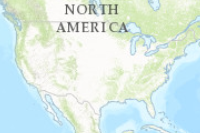

In [32]:
cities_fc_item = fc_search[0]
cities_fc_item

In [33]:
cities_fc_item.download(r'D:\temp')

'D:\\temp\\cities_over1mil_fc'

In [34]:
cities_fc = cities_fc_item.layers
cities_fc

[<FeatureCollection>]

In [35]:
fc1 = cities_fc[0]
fc1_lyr1 = fc1.query()
type(fc1_lyr1)

arcgis.features.feature.FeatureSet

In [36]:
fc1_lyr1.features

[{"geometry": {"x": 1203411, "y": 2401940, "spatialReference": {"wkid": 102100}}, "attributes": {"OBJECTID": 0, "FEATURE": "1", "POP": 150000000, "NAME": "LA"}},
 {"geometry": {"x": 3600476, "y": 2538915, "spatialReference": {"wkid": 102100}}, "attributes": {"OBJECTID": 1, "FEATURE": "2", "POP": 143000000, "NAME": "Dallas"}},
 {"geometry": {"x": 6124732, "y": 1452898, "spatialReference": {"wkid": 102100}}, "attributes": {"OBJECTID": 2, "FEATURE": "3", "POP": 193000000, "NAME": "NYC"}},
 {"geometry": {"x": 4618006, "y": 1286571, "spatialReference": {"wkid": 102100}}, "attributes": {"OBJECTID": 3, "FEATURE": "4", "POP": 128000000, "NAME": "Chicago"}}]

In [37]:
fc1_lyr1.df

FEATURE     NAME        POP  geometry.spatialReference.wkid  \
OBJECTID                                                               
0              1       LA  150000000                          102100   
1              2   Dallas  143000000                          102100   
2              3      NYC  193000000                          102100   
3              4  Chicago  128000000                          102100   

          geometry.x  geometry.y  
OBJECTID                          
0            1203411     2401940  
1            3600476     2538915  
2            6124732     1452898  
3            4618006     1286571